# WFC3 Figure 8 Ghost Classification using Transfer Learning
---

The purpose of the notebook is to demonstrate how to use a DeepWFC3 model to predict if a WFC3 image contains a Figure 8 Ghost. 

## Imports <a id="imports"></a>

If you are running this notebook in Jupyter, this notebook assumes you created the virtual environment defined in `environment.yml`. If not, close this notebook and run the following lines in a terminal window:

`conda env create -f environment.yml`

`conda activate deepwfc3_env`

We import the following libraries:
- *numpy* for handling arrays
- *matplotlib* for plotting
- *torch* as our machine learning framework

We also import functions from `utils.py` to process images to ImageNet format, load the model, and plot saliency maps

In [10]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch.utils.data import Dataset, DataLoader

from utils import load_wfc3_uvis_figure8_model, saliency_map

## Load Data

`examples.npz` is a compressed numpy file containing two WFC3 images post processing pipeline (see (insert py file name here)). The first image is a null image of the galaxy N5643 (idgg69pmq) and the second is the globular cluster NGC-6752 (ibhf01sjq), which contains a figure 8 ghost.

We load the images using `np.load()`.

In [11]:
example = np.load('examples.npz')['examples']
example_0_process = example[0]
example_1_process = example[1]

## Load Model

Our model uses the combination of CNN and Transfer learning architecture. The convolutional layers are frozen, and the fully conneted layers were retrained using the dataset described in (insert ISR and hyperlink here). It used a seven-layer network with three convolution layers and four fully connected layers. 

The model is saved as `wfc3_uvis_figure8_model_d.torch` and can be loaded using `load_wfc3_uvis_figure8_model()`.

In [14]:
model = load_wfc3_uvis_figure8_model('wfc3_uvis_figure8_model_d.torch')

## Predict Examples

To predict the example classifications, we use them as arguments for `model()`, which returns the last two output neurons. The index of the greatest neuron output is the prediction.

In [15]:
pred_0 = model(torch.Tensor(example_0_process.reshape(1, 1, 256, 256)))
pred_1 = model(torch.Tensor(example_1_process.reshape(1, 1, 256, 256)))

In [16]:
print ('Example 0 Output Neurons: {}'.format(pred_0))
print ('Example 1 Output Neurons: {}'.format(pred_1))

Example 0 Output Neurons: tensor([[ 0.0233, -0.1296]], grad_fn=<AddmmBackward0>)
Example 1 Output Neurons: tensor([[-0.2992,  4.5533]], grad_fn=<AddmmBackward0>)


## View Saliency Maps

We can view the [saliency maps](https://arxiv.org/pdf/1312.6034.pdf) our model produces for the examples by using `saliency_map()`, which prints the prediction probabilities, and plots the original image and the saliency map.

True Label: 0
Prediction: 0


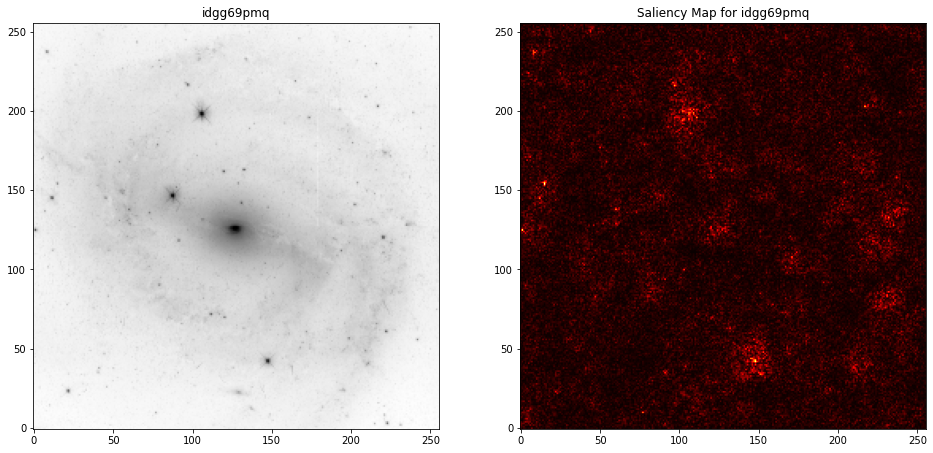

True Label: 1
Prediction: 1


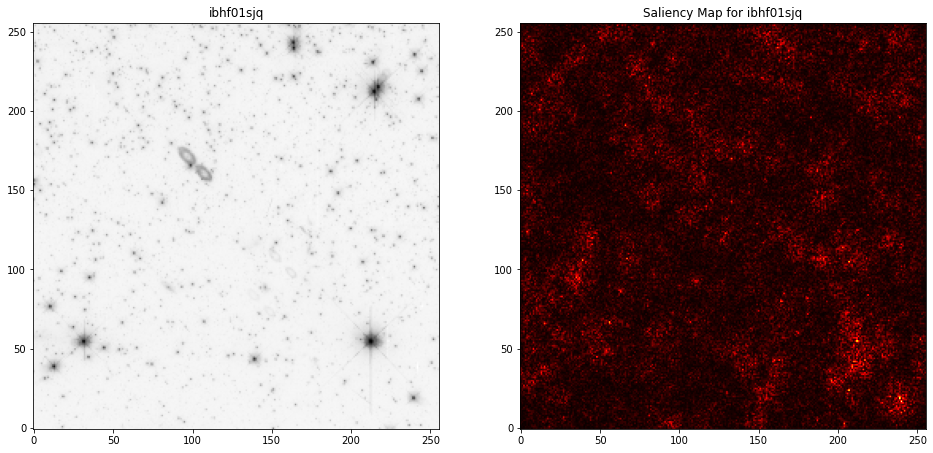

In [17]:
sm = saliency_map(model, example_0_process, 0, 0,'idgg69pmq')
sm = saliency_map(model, example_1_process,1, 1, 'ibhf01sjq')

## Conclusions <a id="con"></a>

Thank you for walking through this notebook. Now you should be more familiar with using our model to predict if figure 8 ghosts are on WFC3 images.

## About this Notebook <a id="about"></a>

**Author:** Nilufar Easmin

**Updated on:** 2022-02-25

## Citations <a id="cite"></a>

If you use `numpy`, `matplotlib`, or `torch` for published research, please cite the authors. Follow these links for more information about citing `numpy`, `matplotlib`, and `torch`:

* [Citing `numpy`](https://numpy.org/doc/stable/license.html)
* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/license.html#:~:text=Matplotlib%20only%20uses%20BSD%20compatible,are%20acceptable%20in%20matplotlib%20toolkits.)
* [Citing `torch`](https://github.com/pytorch/pytorch/blob/master/LICENSE)